## Data Preparation: Export, Clean and Transform data
*Analyst:* José Eduardo Téllez


### Objetive
This notebook aims to prepare data for next analysis by cleaning, and transforming the data. 
The source file, `'data_science_test_data.xlsx'`, was provided by the HR team,
 and it contains the raw data that will be processed to ensure quality and consistency.


 ### Functions:

Any function used here would be saved at lib folder.







## 1. Import packages
In this section, we import the necessary libraries

In [68]:
import pandas as pd
import os 
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Define Path
In this section, we defined the path that would be used. 

In [23]:
main_path = os.path.dirname(os.path.abspath(os.getcwd()))

In [25]:
sys.path.append(os.path.join(main_path, 'lib'))

## 3. Functions
If any function is used it would be export in this section

## 4. Import data

In [30]:
## Media data import
media_dt = pd.read_excel(os.path.join(main_path, 'data/data_science_test_data.xlsx'), sheet_name = 'Sheet1')
## Lead data import
lead_dt = pd.read_excel(os.path.join(main_path, 'data/data_science_test_data.xlsx'), sheet_name = 'Sheet2')

In [29]:
media_dt.head(5
)

,DATE,googlesearch_s,facebook_s,display_s,promotion?
0,2022-02-04,2424.34,200.72,284,NaN
1,2022-02-05,2110.07,407.44,194,NaN
2,2022-02-06,2091.32,395.24,247,NaN
3,2022-02-07,2867.82,415.98,211,NaN
4,2022-02-08,2569.72,433.87,283,NaN


In [34]:
media_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            939 non-null    datetime64[ns]
 1   googlesearch_s  936 non-null    float64       
 2   facebook_s      939 non-null    float64       
 3   display_s       939 non-null    int64         
 4   promotion?      70 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 36.8+ KB


In [31]:
lead_dt.head(5)

,Lead ID,Lead Date,Qualified Date,Purchase Date
0,1,2022-02-07,2022-02-08,NaT
1,2,2022-02-07,2022-02-09,2022-04-14
2,3,2022-02-09,2022-02-09,2022-09-19
3,4,2022-02-06,2022-02-11,NaT
4,5,2022-02-10,2022-02-11,NaT


In [33]:
lead_dt.info(   )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11733 entries, 0 to 11732
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Lead ID         11733 non-null  int64         
 1   Lead Date       11733 non-null  datetime64[ns]
 2   Qualified Date  1388 non-null   datetime64[ns]
 3   Purchase Date   300 non-null    datetime64[ns]
dtypes: datetime64[ns](3), int64(1)
memory usage: 366.8 KB


## 5. Media data clean

This section consist in clean the media data

In [35]:
media_dt.describe()

,DATE,googlesearch_s,facebook_s,display_s
count,939,936.000000,939.000000,939.000000
mean,2023-05-19 00:00:00,2607.854141,384.267082,217.687966
min,2022-02-04 00:00:00,567.310000,0.000000,100.000000
25%,2022-09-26 12:00:00,2095.332750,266.210000,166.000000
50%,2023-05-19 00:00:00,2532.842250,308.210000,219.000000
75%,2024-01-08 12:00:00,3091.270825,567.520000,279.000000
max,2024-08-30 00:00:00,5000.434700,798.240000,300.000000
std,NaN,746.689067,168.023296,59.236917


In [36]:
media_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            939 non-null    datetime64[ns]
 1   googlesearch_s  936 non-null    float64       
 2   facebook_s      939 non-null    float64       
 3   display_s       939 non-null    int64         
 4   promotion?      70 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 36.8+ KB


In [76]:
## First we rename the df with simple names
media_names = {'DATE': 'date', 'googlesearch_s':'ggsearch', 'facebook_s':'facebook','display_s': 'display', 'promotion?'  : 'promotion'}
media_rn = media_dt.rename(columns= media_names)

## We do some changes, date is already a datetime64 but just to have caution, and we transform promotion into a 1 or 0 variable. 1 if is promotion, 0 if is not
media_rn['date'] = pd.to_datetime(media_rn['date'])
media_rn['promotion'] = np.where(media_rn['promotion'].isna(), 0, 1)
media_rn.head(10
)

,date,ggsearch,facebook,display,promotion
0,2022-02-04,2424.34,200.72,284,0
1,2022-02-05,2110.07,407.44,194,0
2,2022-02-06,2091.32,395.24,247,0
3,2022-02-07,2867.82,415.98,211,0
4,2022-02-08,2569.72,433.87,283,0
5,2022-02-09,2808.94,427.29,135,0
6,2022-02-10,2728.04,425.30,281,0
7,2022-02-11,2477.71,434.02,200,0
8,2022-02-12,1789.40,419.92,263,0
9,2022-02-13,1983.92,400.09,175,0


In [62]:
# simple dictionary that will be use to examine the variables
agg_list = {
    'date': 'count',
    'ggsearch': ['sum', 'min', 'mean' , 'median', 'max'],
    'facebook': ['sum', 'min', 'mean' , 'median' ,'max'],
    'display': ['sum', 'min', 'mean' , 'median', 'max'],
    'promotion': ['sum', 'min', 'mean' , 'median', 'max']
}

In [63]:
media_rn['promotion'].unique()
media_rn.groupby(['promotion']).agg(agg_list)

date      ggsearch                                               \
          count           sum       min         mean     median        max   
promotion                                                                    
0           869  2.293213e+06  567.3100  2648.051629  2568.4327  5000.4347   
1            70  1.477388e+05  595.1414  2110.553796  2074.2518  4228.6650   

            facebook                              ... display       \
                 sum    min        mean   median  ...     sum  min   
promotion                                         ...                
0          335916.85    0.0  386.555639  309.430  ...  189131  100   
1           24909.94  199.6  355.856286  286.055  ...   15278  106   

                                  promotion                      
                 mean median  max       sum min mean median max  
promotion                                                        
0          217.642117  219.0  300         0   0  0.0    0.0   0  
1          218.257143  218.5  299        70   1  1.0    1.0   1  

[2 rows x 21 columns]

## GGSEARCH OBS

In the plot below, we can see how GGSearch: 
* In 2022, there was a clear increase in investment
* In 2023, the trend shifted, and spending started to drop, staying lower throughout the year.
* However, at the start of 2024, there’s a noticeable increase, which suggests that the company decided to put more budget into GGSearch again.

This increase early in 2024 could mean the company sees more value in this channel now or is aiming to get better performances

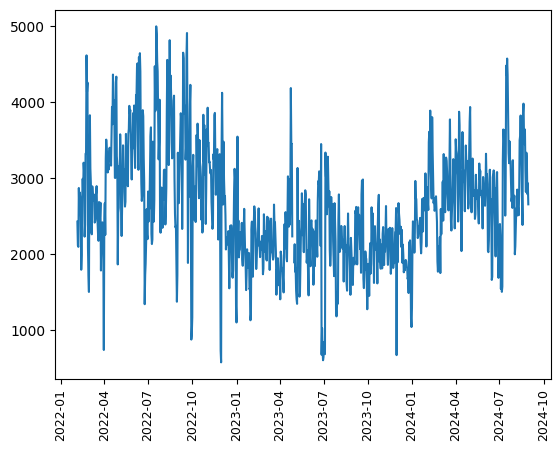

In [79]:
plt.plot(media_rn['date'], media_rn['ggsearch'])
plt.tick_params(axis='x', rotation=90, labelsize = 9)
plt.show()

## ggsave observations

## FACEBOOK OBS

In the plot below, we can see how facebok investment:
* In 2022 and 2023 there was a very delicated decrease but the investment maintain a flat behavior.
* While in 2024, we see something complete different, We can vizualize a more agressive campain.





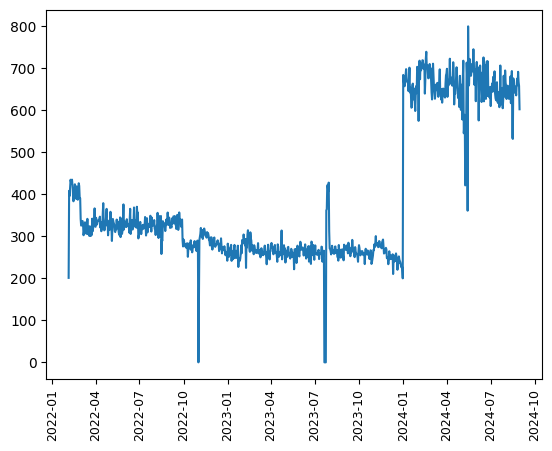

In [74]:
plt.plot(media_rn['date'], media_rn['facebook'])
plt.tick_params(axis='x', rotation=90, labelsize = 9)
plt.show()

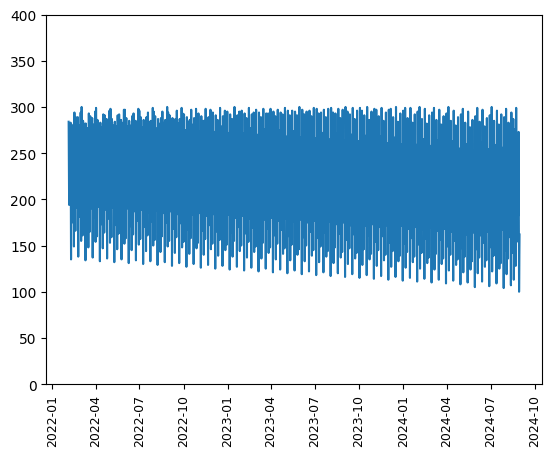

In [78]:
plt.plot(media_rn['date'], media_rn['display'])
plt.tick_params(axis='x', rotation=90, labelsize = 9)
plt.ylim( 0, 400)
plt.show()
## For display what we can see is that it look like irregular. 